### Практика проверки гипотез

**1)** По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [31]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

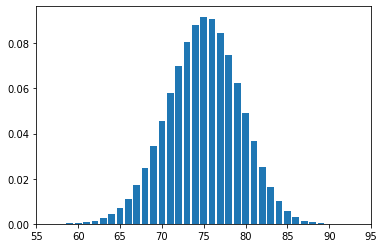

In [10]:
# Рассмотрим Биномиальное распределение (СВ - сресс есть или нет)
n = 100
p = 0.75
F_H0 = stats.binom(n, p)

# Нарисуем нулевое распределение 
x = np.linspace(0, 100, 101)
plt.bar(x, F_H0.pmf(x), align = 'center');
plt.xlim(55, 95);

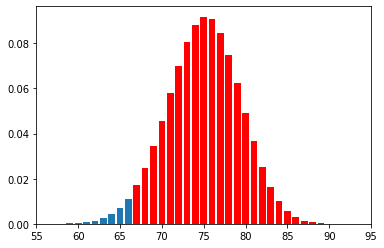

In [13]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(67, 100, 34), F_H0.pmf(np.linspace(67, 100, 34)), align = 'center', color='red')
plt.xlim(55, 95);

График свидетельствует о справедливости ```H0```. Для строгой оценки взглянем на ```p-value```

In [17]:
p_value = stats.binom_test(67, n, p)
print('p_value: ', round(p_value, 4))

p_value:  0.0822


**2)** Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты:
- Условия работы в этой сети лучше, чем в среднем 
- Сеть известна низкими зарплатами и большой текучкой кадров, поэтому туда идут работать люди, не склонные переживать о сохранении рабочего места
- Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным
- Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников

**3)** The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200)

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию ```scipy.stats.binned_statistic_2d```.

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [29]:
data = pd.read_csv('pines.txt', sep = '\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [38]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(data['sn'], data['we'], None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [34]:
print(trees_bins.x_edge)
print(trees_bins.y_edge)

[  0.  40.  80. 120. 160. 200.]
[  0.  40.  80. 120. 160. 200.]


In [36]:
# Среднее ожидаем значение сосен в каждом квадрате
tree_mean = np.sum(trees_squares_num)/(sn_num*we_num)
print('среднее ожидаемое количество сосен в каждом квадрате: ', tree_mean)

среднее ожидаемое количество сосен в каждом квадрате:  23.36


**4)** Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [39]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

Распределение неравноемерное. H0 отвергается

**5)** Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с ```25-1 = 24``` степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы ```K-1```, где ```K``` — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию ```scipy.stats.chi2.cdf```, в качестве значения параметра ```df``` нужно взять 24 (это число степеней свободы); если функцию ```scipy.stats.chisquare```  — параметр ```ddof``` нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?
- Да